In [29]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Загрузка и первичный обзор

In [21]:
# загрузка, просмотр первых и последних 5 строк
file_path = 'google_books_dataset.csv'
df = pd.read_csv(file_path)

print("Первые 5 строк:")
print(df.head())
print("\nПоследние 5 строк:")
print(df.tail())

Первые 5 строк:
        book_id                                    title  \
0  LR_VDQAAQBAJ                              Bestsellers   
1  WcjTDQAAQBAJ                              Bestsellers   
2  4fXUDAAAQBAJ                      The Bestseller Code   
3  yIVuDwAAQBAJ                               Bestseller   
4  2JHXwAEACAAJ  Bestsellers: Popular Fiction since 1900   

                                            subtitle  \
0  The Path (bestsellers, free bestsellers, bests...   
1  Hell: A Place Without Hope (bestseller books, ...   
2                   Anatomy of the Blockbuster Novel   
3              A Century of America's Favorite Books   
4                                                NaN   

                            authors                  publisher published_date  \
0            Ivan King, bestsellers                bestsellers     2017-01-04   
1            Ivan King, bestsellers                bestsellers     2017-01-03   
2  Jodie Archer, Matthew L. Jockers        

In [12]:
# нахождение информации о структуре данных
print("\nИнформация о структуре данных:")
print(df.info())


Информация о структуре данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15147 entries, 0 to 15146
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   book_id          15147 non-null  object 
 1   title            15139 non-null  object 
 2   subtitle         5983 non-null   object 
 3   authors          11622 non-null  object 
 4   publisher        7090 non-null   object 
 5   published_date   14933 non-null  object 
 6   description      8351 non-null   object 
 7   page_count       14933 non-null  float64
 8   categories       12695 non-null  object 
 9   average_rating   857 non-null    float64
 10  ratings_count    15147 non-null  int64  
 11  language         15147 non-null  object 
 12  preview_link     15147 non-null  object 
 13  info_link        15147 non-null  object 
 14  isbn_13          7383 non-null   float64
 15  isbn_10          7121 non-null   object 
 16  list_price       2943 non-

In [13]:
# типы данных
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
df['isbn_13'] = df['isbn_13'].astype('Int64').astype(str)

print("\nТипы данных каждой колонки:")
print(df.dtypes)


Типы данных каждой колонки:
book_id                    object
title                      object
subtitle                   object
authors                    object
publisher                  object
published_date     datetime64[ns]
description                object
page_count                float64
categories                 object
average_rating            float64
ratings_count               int64
language                   object
preview_link               object
info_link                  object
isbn_13                    object
isbn_10                    object
list_price                float64
currency                   object
buyable                      bool
search_category            object
thumbnail                  object
dtype: object


Обработка данных

In [14]:
# нахождение количество пропусков
print("Количество пропусков по колонкам:")
print(df.isnull().sum())
total_cells = df.shape[0] * df.shape[1]
total_missing = df.isnull().sum().sum()
print(f"\nОбщее количество пропущенных значений: {total_missing}")
print(f"Процент пропусков: {total_missing / total_cells * 100:.2f}%")

Количество пропусков по колонкам:
book_id                0
title                  8
subtitle            9164
authors             3525
publisher           8057
published_date      9093
description         6796
page_count           214
categories          2452
average_rating     14290
ratings_count          0
language               0
preview_link           0
info_link              0
isbn_13                0
isbn_10             8026
list_price         12204
currency           12204
buyable                0
search_category        0
thumbnail            669
dtype: int64

Общее количество пропущенных значений: 86702
Процент пропусков: 27.26%


In [22]:
# удаление большого количества пропусков
df = df.drop(columns=['subtitle', 'isbn_10', 'list_price', 'currency', 'isbn_13'])

# заполнение небольшого количества пропусков
df = df.dropna(subset=['title'])
df['authors'] = df['authors'].fillna('Unknown')
df['publisher'] = df['publisher'].fillna('Unknown')
df['published_date'] = pd.to_datetime(df['published_date'], errors='coerce')
median_date = df['published_date'].median()
df['published_date'] = df['published_date'].fillna(median_date)
df['description'] = df['description'].fillna('No description')
df['page_count'] = df['page_count'].fillna(df['page_count'].median()).astype(int)
df['categories'] = df['categories'].fillna('Uncategorized')
df['average_rating'] = df['average_rating'].fillna(df['average_rating'].median())
df['thumbnail'] = df['thumbnail'].fillna('No image')

print("\nКоличество пропусков после обработки:")
print(df.isnull().sum())


Количество пропусков после обработки:
book_id            0
title              0
authors            0
publisher          0
published_date     0
description        0
page_count         0
categories         0
average_rating     0
ratings_count      0
language           0
preview_link       0
info_link          0
buyable            0
search_category    0
thumbnail          0
dtype: int64


In [25]:
# дубликаты
duplicates = df.duplicated()
print(f"Количество дублирующихся строк: {duplicates.sum()}")

Количество дублирующихся строк: 0


In [30]:
# выбросы с помощью z-score
numeric_cols = ['page_count', 'average_rating', 'ratings_count']

z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))

outliers = (z_scores > 3).any(axis=1)
print(f"Количество строк с выбросами: {outliers.sum()}")

print(df[outliers].head())


Количество строк с выбросами: 790
          book_id                                              title  \
81   51sbAQAAMAAJ                    Subject Guide to Books in Print   
103  KEQAl59xDBgC  Publishers' Circular and Booksellers' Record o...   
111  JJojMQAACAAJ                                     After the Game   
118  srrtzgEACAAJ                                   The Devil To Pay   
125  yEo1DwAAQBAJ                                  Collected Fiction   

            authors        publisher published_date  \
81          Unknown          Unknown     2017-07-25   
103         Unknown          Unknown     2017-07-25   
111     Abbi Glines          Unknown     2017-08-22   
118  Gary Blackwood          Unknown     2022-06-02   
125      Irwin Shaw  Open Road Media     2017-10-03   

                                           description  page_count  \
81                                      No description        3310   
103                                     No description        

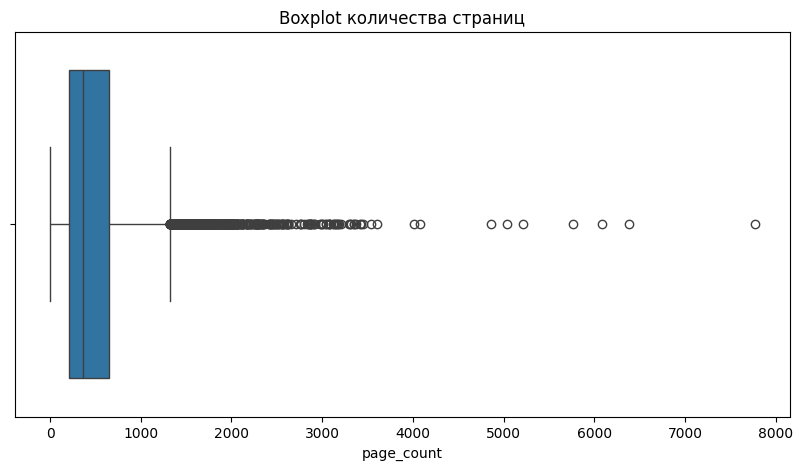

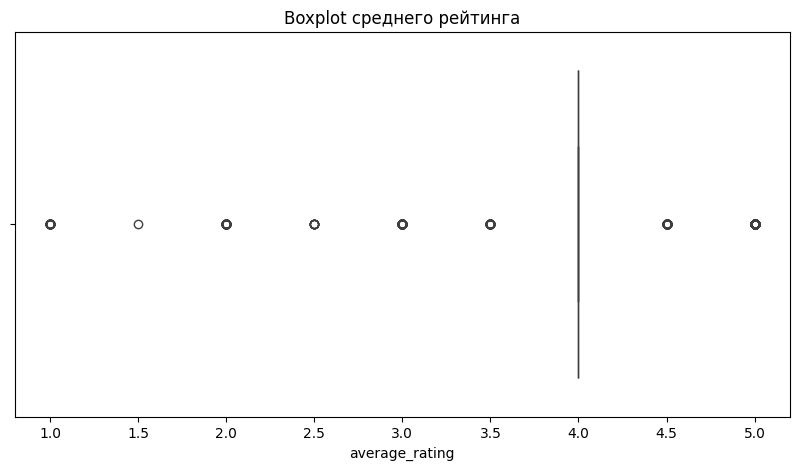

In [28]:

# выбросы визуально
plt.figure(figsize=(10,5))
sns.boxplot(x=df['page_count'])
plt.title('Boxplot количества страниц')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df['average_rating'])
plt.title('Boxplot среднего рейтинга')
plt.show()

Статистики данных

In [32]:
# описательная статистика
print("Описательная статистика числовых колонок:")
print(df.describe())
print("\nОписательная статистика всех колонок:")
print(df.describe(include='all'))

Описательная статистика числовых колонок:
                      published_date    page_count  average_rating  \
count                          15139  15139.000000    15139.000000   
mean   2016-12-13 03:14:19.634057984    483.130854        4.002609   
min              1928-04-01 00:00:00      0.000000        1.000000   
25%              2017-07-25 00:00:00    208.000000        4.000000   
50%              2017-07-25 00:00:00    368.000000        4.000000   
75%              2017-07-25 00:00:00    652.000000        4.000000   
max              2026-07-02 00:00:00   7768.000000        5.000000   
std                              NaN    435.596697        0.263071   

       ratings_count  
count   15139.000000  
mean        0.379550  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max       826.000000  
std         9.276984  

Описательная статистика всех колонок:
             book_id     title  authors publisher  \
count          15139     151

In [33]:
# подсчёт уникальных значений, частоты
print("\nУникальные значения в 'categories':")
print(df['categories'].nunique())

print("\nТоп-10 самых частых категорий:")
print(df['categories'].value_counts().head(10))

print("\nТоп-10 авторов по количеству книг:")
print(df['authors'].value_counts().head(10))


Уникальные значения в 'categories':
1830

Топ-10 самых частых категорий:
categories
Uncategorized           2444
Fiction                  994
Computers                737
Business & Economics     563
Education                371
History                  365
Cooking                  309
Medical                  254
Science                  252
Literary Criticism       250
Name: count, dtype: int64

Топ-10 авторов по количеству книг:
authors
Unknown                     3517
Stephen King                  60
Nora Roberts                  58
Brandon Sanderson             55
Malcolm Gladwell              55
Agatha Christie               55
Chimamanda Ngozi Adichie      53
Terry Pratchett               53
Cal Newport                   51
Neil Gaiman                   47
Name: count, dtype: int64


Числовые колонки для корреляции: Index(['page_count', 'average_rating', 'ratings_count'], dtype='object')

Корреляционная матрица числовых колонок:
                page_count  average_rating  ratings_count
page_count        1.000000       -0.005805       0.001516
average_rating   -0.005805        1.000000      -0.026905
ratings_count     0.001516       -0.026905       1.000000


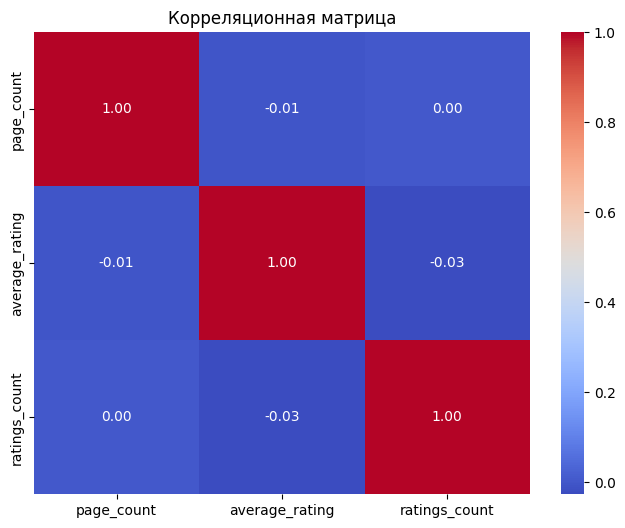

In [36]:
# корреляционный анализ
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Числовые колонки для корреляции:", numeric_cols)

corr_matrix = df[numeric_cols].corr()
print("\nКорреляционная матрица числовых колонок:")
print(corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

Визуализация данных

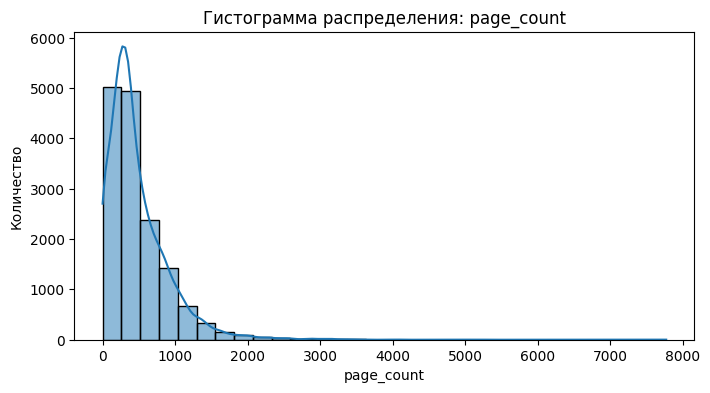

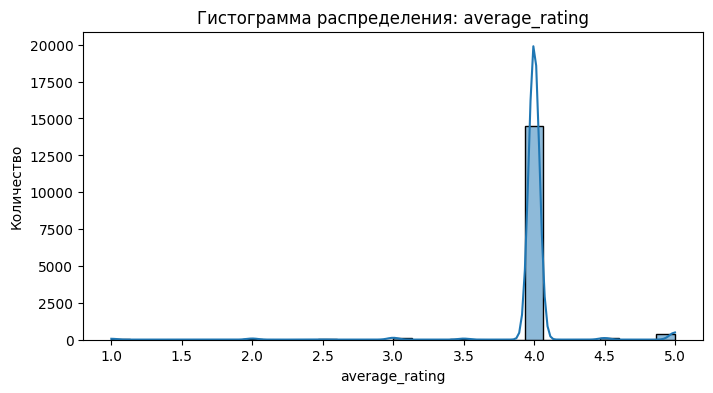

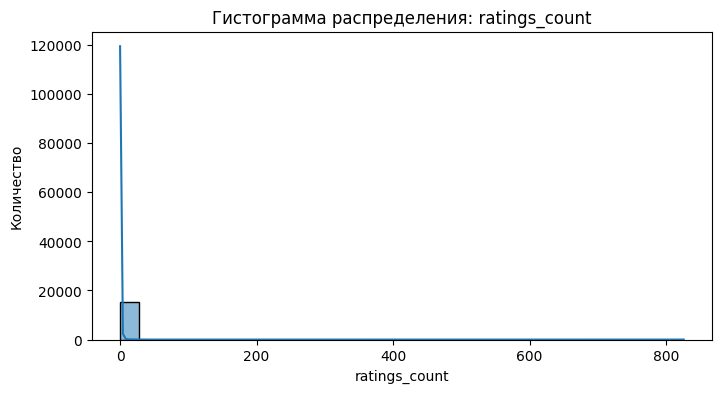

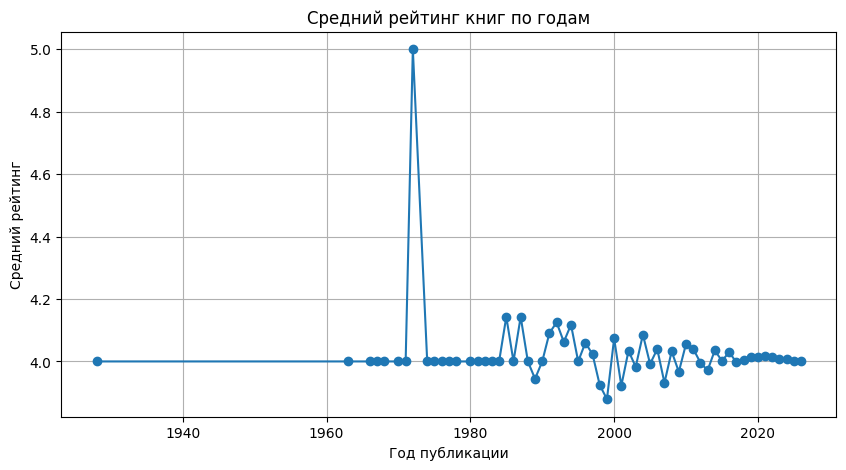

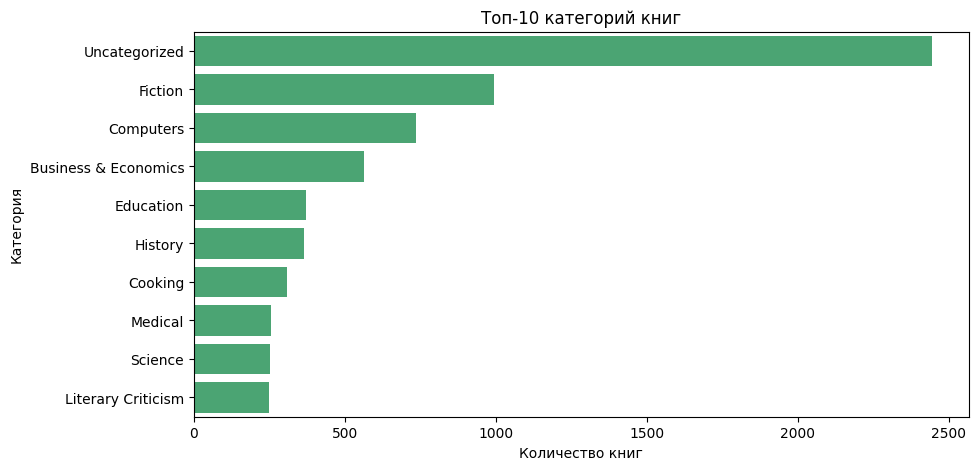

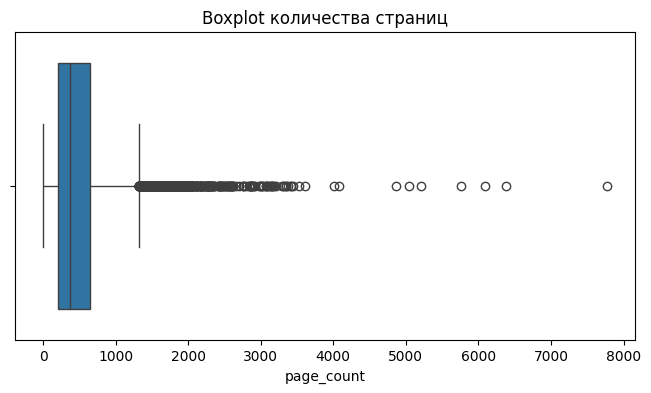

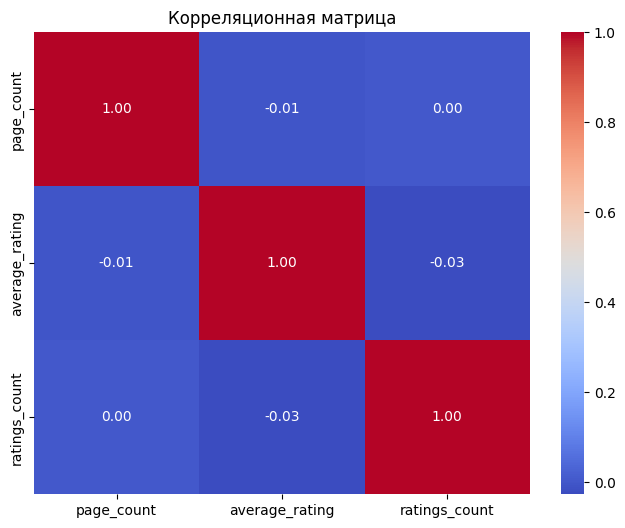

In [39]:
numeric_cols = ['page_count', 'average_rating', 'ratings_count']
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Гистограмма распределения: {col}')
    plt.xlabel(col)
    plt.ylabel('Количество')
    plt.show()

# 2 Линейный график (средний рейтинг по годам публикации)
df['published_year'] = df['published_date'].dt.year
rating_by_year = df.groupby('published_year')['average_rating'].mean().dropna()

plt.figure(figsize=(10,5))
plt.plot(rating_by_year.index, rating_by_year.values, marker='o')
plt.title('Средний рейтинг книг по годам')
plt.xlabel('Год публикации')
plt.ylabel('Средний рейтинг')
plt.grid(True)
plt.show()

# 3 Столбчатая диаграмма (топ-10 категорий по количеству книг)
plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.values, y=top_categories.index, color='mediumseagreen')
plt.title('Топ-10 категорий книг')
plt.xlabel('Количество книг')
plt.ylabel('Категория')
plt.show()

# 4 Boxplot (распределение количества страниц)
plt.figure(figsize=(8,4))
sns.boxplot(x=df['page_count'])
plt.title('Boxplot количества страниц')
plt.show()

# 5 Heatmap корреляций (числовые колонки)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

Группировки и агрегации

In [42]:
avg_rating_by_category = df.groupby('categories')['average_rating'].mean().sort_values(ascending=False)
median_pages_by_category = df.groupby('categories')['page_count'].median().sort_values(ascending=False)

print("Средний рейтинг по категориям:")
print(avg_rating_by_category.head(10))
print("\nМедианное количество страниц по категориям:")
print(median_pages_by_category.head(10))

# подсчёт количества
books_count_by_publisher = df.groupby('publisher')['book_id'].count().sort_values(ascending=False)
print("\nКоличество книг по издателям (топ-10):")
print(books_count_by_publisher.head(10))

# суммирование (sum)
ratings_sum_by_author = df.groupby('authors')['ratings_count'].sum().sort_values(ascending=False)
print("\nСуммарное количество рейтингов по авторам (топ-10):")
print(ratings_sum_by_author.head(10))

# сводная таблица (pivot_table)
pivot = pd.pivot_table(df,
                       values='average_rating',
                       index='categories',
                       columns='language',
                       aggfunc='mean')
print("\nСводная таблица: средний рейтинг по категориям и языкам")
pivot_filled = pivot.fillna(0)
print(pivot_filled.head(10))

Средний рейтинг по категориям:
categories
Microtechnology         5.000000
Fish oil industry       5.000000
Hospitality industry    5.000000
Commercial catalogs     5.000000
Stationery trade        4.500000
Restaurants             4.500000
Yoga                    4.500000
Internal medicine       4.500000
Bhagavadgītā            4.500000
Washington (D.C.)       4.333333
Name: average_rating, dtype: float64

Медианное количество страниц по категориям:
categories
Retired military personnel          3604.0
Soyfoods                            3494.0
Consultants                         2852.0
Audiobooks                          2616.0
Grits                               2611.0
Constitutions                       2594.0
Films for hard of hearing people    2166.0
Capitalists and financiers          1976.0
Catalogs, Publishers'               1974.0
Court laws                          1836.0
Name: page_count, dtype: float64

Количество книг по издателям (топ-10):
publisher
Unknown               